<div align="center">

# Classifying Gamer Engagement Levels Using K-Nearest Neighbors:  
## A Feature Engineering and Performance Optimization Approach  

</div>

---
**Author:** *MUGOT, Chris Jallaine S.*  
**Date:** *2025-03-01*  
**Dataset:** `game-data.csv`  
**Objective:**  
✔ Classify gamers into **Casual, Intermediate, and Hardcore**  
✔ Optimize **KNN performance** through **feature selection & tuning**  
✔ Evaluate model accuracy using **classification metrics & PCC**  

---

### Problem Statement:

**Understanding Gamer Engagement for Better Retention**
<br>
<br> Player retention is a significant challenge in the gaming industry. Many players stop engaging with a game due to a lack of personalized experiences. This study aims to classify gamers based on engagement levels using a machine learning approach, providing insights for game developers to enhance player retention strategies.

The lack of data-driven decision-making in game design often leads to misalignment between player expectations and in-game experiences. By classifying gamers into Casual, Intermediate, and Hardcore categories based on in-game behaviors, this research aims to help developers optimize difficulty settings, rewards, and monetization strategies.

**Why This Problem is Important?** <br>
<br>
✔ Helps game developers design better reward systems and difficulty balancing.<br>
✔ Improves player retention by understanding and predicting engagement levels. <br>
✔ Supports marketing teams in targeting the right audience for game promotions.<br>
✔ Enhances user experience by dynamically adjusting game features based on engagement.

### Libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

###  Explore The Data

#### Information About The Features:

- **PlayerID**: Unique identifier for each player.
- **Age**: Age of the player.
- **Gender**: Gender of the player.
- **Location**: Geographic location of the player.
- **GameGenre**: Genre of the game the player is engaged in.
- **PlayTimeHours**: Average hours spent playing per session.
- **InGamePurchases**: Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).
- **GameDifficulty**: Difficulty level of the game.
- **SessionsPerWeek**: Number of gaming sessions per week.
- **AvgSessionDurationMinutes**: Average duration of each gaming session in minutes.
- **PlayerLevel**: Current level of the player in the game.
- **AchievementsUnlocked**: Number of achievements unlocked by the player.


In [ ]:
# Step 1: Load the dataset
file_path = "game-data.csv"
data = pd.read_csv(file_path)

In [ ]:
data.columns.str.strip().str.replace(r'\s+', '_', regex=True).str.replace(r'[^\w_]', '', regex=True)

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 3.7+ MB


In [ ]:
# Step 2: Check for missing values
data.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
dtype: int64

In [ ]:
# Get basic statistics
data.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [ ]:
print("Duplicate rows:", data.duplicated().sum())

Duplicate rows: 0


In [ ]:
# Define columns to keep
columns_to_keep = ["PlayTimeHours", "SessionsPerWeek", "AvgSessionDurationMinutes", "PlayerLevel", "AchievementsUnlocked"]

# Drop unnecessary columns
data = data[columns_to_keep]

data.head()

,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,16.271119,6,108,79,25
1,5.525961,5,144,11,10
2,8.223755,16,142,35,41
3,5.265351,9,85,57,47
4,15.531945,2,131,95,37


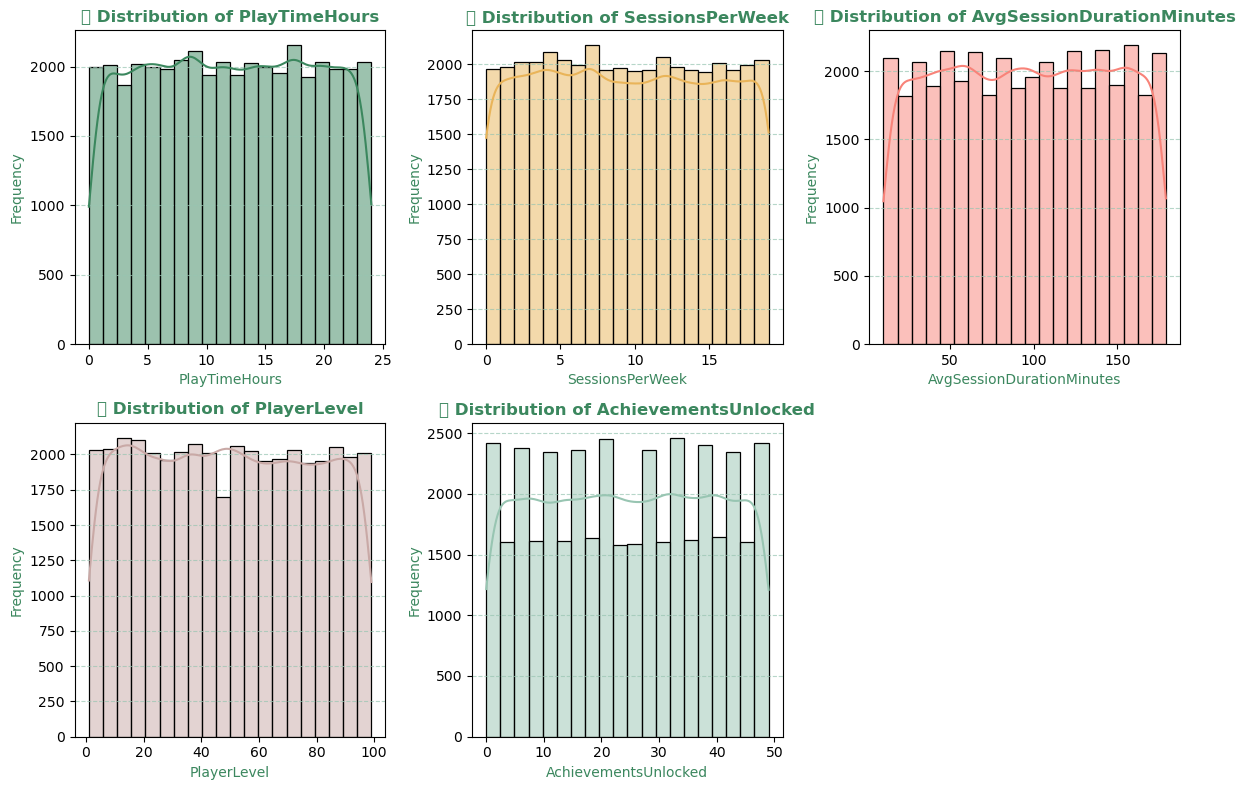

In [ ]:
# Plot the Distribution
plt.figure(figsize=(12, 8))

colors = ["#98C5B2", "#3B875E", "#E9B459", "#F88379", "#C9A9A6"]  # Updated colors

for i, feature in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, bins=20, color=colors[i % len(colors)])  # Cycle through colors
    plt.title(f"📊 Distribution of {feature}", fontsize=12, fontweight='bold', color="#3B875E")
    plt.xlabel(feature, fontsize=10, color="#3B875E")
    plt.ylabel("Frequency", fontsize=10, color="#3B875E")
    plt.grid(axis="y", linestyle="--", alpha=0.7, color="#98C5B2")

plt.tight_layout()

**Interpretation:**

The distribution plot shows how each feature is spread out, helping to identify patterns, skewness, and outliers. A **bell-shaped curve** suggests a **normal distribution**, while **right or left skewness** indicates an uneven spread of values, possibly due to outliers. **Peaks and gaps** may reveal clusters or unusual patterns in the data. If features have very different scales, **normalization or standardization** may be needed for better model performance. Similar feature distributions might indicate **redundancy**, while **multimodal distributions** suggest multiple groups in the dataset. This analysis helps in deciding **feature selection, scaling, and transformations** for improving model accuracy.

### Discussion of distribution analysis: <br>


Before diving into model training, it's essential to explore how each feature is distributed. This helps in understanding potential patterns, outliers, and necessary preprocessing steps. Below is a breakdown of our key numerical features:

### 🔹 **PlayTimeHours, SessionsPerWeek, and AvgSessionDurationMinutes**
- These features show a **relatively uniform distribution** with no significant skewness.
- There are no extreme peaks or heavy tails, indicating that **normalization may not be necessary**.
- Since these attributes represent **session-based gaming behavior**, they are crucial in distinguishing casual from hardcore gamers.

### 🔹 **PlayerLevel**
- The distribution appears **evenly spread**, but it extends up to **100**, indicating players have different gaming experiences.
- A higher level often correlates with **greater dedication and time investment**, a strong indicator for engagement classification.
- **Scaling might be beneficial** to ensure it does not dominate other features during model training.

### 🔹 **AchievementsUnlocked**
- The distribution is also **evenly spread**, suggesting players unlock achievements at a steady rate.
- This feature is highly relevant for distinguishing between **Casual, Intermediate, and Hardcore gamers**.
- Players with significantly **higher achievements** tend to exhibit **higher engagement levels**.

###Next Steps That Should Be Considered:
- **Feature Scaling**: Some features may require **scaling or normalization** to optimize model performance.
- **Correlation Analysis**: Understanding how these features relate to each other and the target variable.
- **Feature Selection**: Identifying which attributes contribute most to accurate classification.

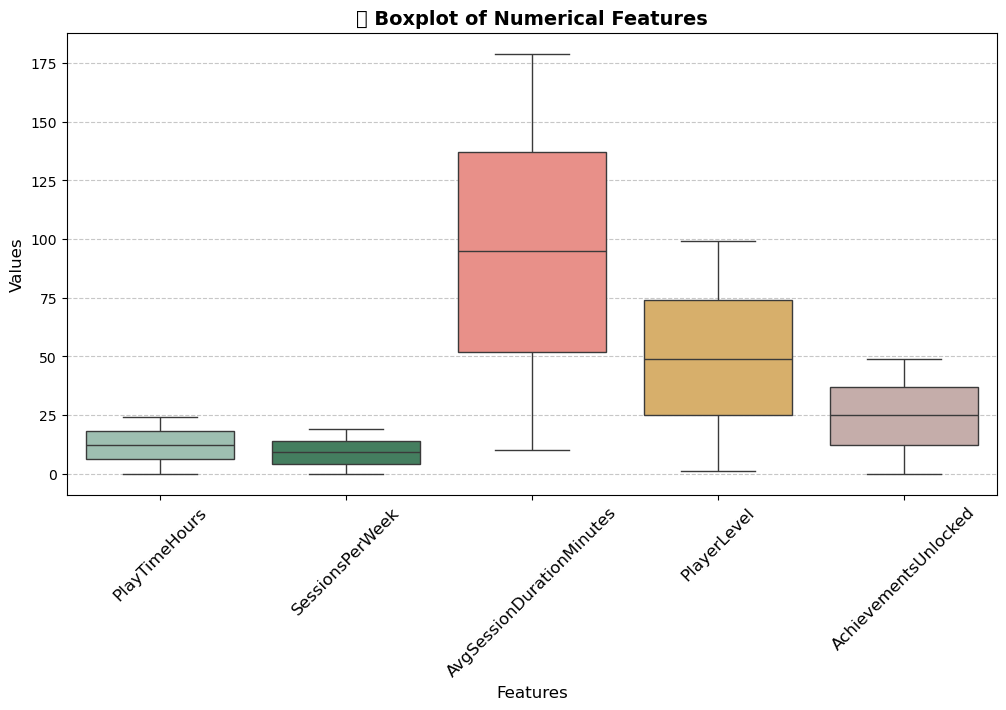

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, palette=["#98C5B2", "#3B875E", "#F88379", "#E9B459", "#C9A9A6"])
plt.xticks(rotation=45, fontsize=12)
plt.title("📊 Boxplot of Numerical Features", fontsize=14, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Discussion:
<br>

### 🔹 **1. PlayTimeHours & SessionsPerWeek**  
- No extreme outliers, indicating **consistent play patterns**.  
- The small range suggests most players have **similar gaming habits**.  
- A balance between these features is crucial for distinguishing **casual and dedicated players**.  

### 🔹 **2. AvgSessionDurationMinutes**  
- Wide range (from a few minutes to nearly **180 minutes per session**).  
- A few **potential outliers** at the higher end (players with very long sessions).  
- This could be a **strong factor** in defining **Hardcore vs. Casual gamers**.  

### 🔹 **3. PlayerLevel**  
- Values range from **0 to 100**, representing varying experience levels.  
- Some players have significantly **higher levels**, possibly indicating **long-term engagement**.  
- This feature may correlate with **engagement level and skill mastery**.  

### 🔹 **4. AchievementsUnlocked**  
- Values appear **evenly distributed**, but some players unlock significantly **more achievements**.  
- This could serve as a **strong indicator of dedication & skill level**.  
- Players with high achievements may be **more engaged and goal-driven**.


### Defining Threshold:

WHERE RESULTS CLASSIFIES: <br>

**Casual (0)** → Light gamers with minimal playtime and engagement <br>
**Intermediate (1)** → Moderate gamers with decent engagement <br>
**Hardcore (2)** → Highly engaged gamers with high playtime and achievements

In [ ]:
def classify_gamer(row):
    if (row["PlayTimeHours"] >= 7 and
        row["SessionsPerWeek"] >= 5 and
        row["AvgSessionDurationMinutes"] >= 30 and
        row["PlayerLevel"] >= 30 and
        row["AchievementsUnlocked"] >= 15):
        return 2  # Hardcore

    elif (row["PlayTimeHours"] >= 1.6 and
          row["SessionsPerWeek"] >= 3 and
          row["AvgSessionDurationMinutes"] >= 15 and
          row["PlayerLevel"] >= 10 and
          row["AchievementsUnlocked"] >= 8):
        return 1  # Intermediate

    else:
        return 0  # Casual

# Apply updated classification
data["GamerType"] = data.apply(classify_gamer, axis=1)

In [ ]:
data.head()

,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,GamerType
0,16.271119,6,108,79,25,2
1,5.525961,5,144,11,10,1
2,8.223755,16,142,35,41,2
3,5.265351,9,85,57,47,1
4,15.531945,2,131,95,37,0


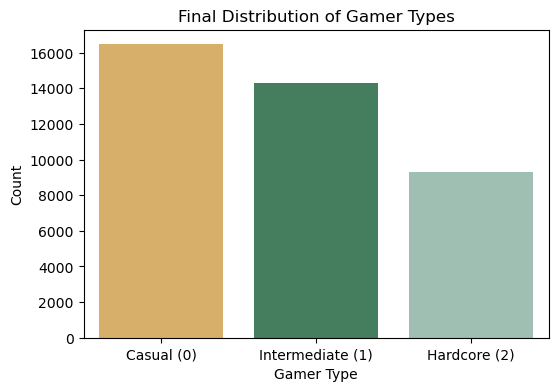

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data["GamerType"], palette=["#E9B459", "#3B875E", "#98C5B2"])
plt.xticks([0, 1, 2], ["Casual (0)", "Intermediate (1)", "Hardcore (2)"])
plt.title("Final Distribution of Gamer Types")
plt.xlabel("Gamer Type")
plt.ylabel("Count")
plt.show()

**Interpretation**

The classification function categorizes gamers into three types: **Casual (0), Intermediate (1), and Hardcore (2)** based on playtime, session frequency, session duration, player level, and achievements unlocked. **Hardcore gamers** play **7+ hours per week**, have **5+ sessions**, and maintain a **high level and achievements**, while **Intermediate gamers** play **at least 1.6 hours per week** with moderate engagement. **Casual gamers** fall below these thresholds. The count plot shows the distribution of each gamer type, highlighting which category is most common. This classification helps in understanding player behavior, allowing for **targeted strategies** in game development, marketing, and engagement.

### MORE OF EDA

> **Gaming Sessions Per Week - Are Hardcore Gamers More Active?** <br>
> Purpose: Show how Casual, Intermediate, and Hardcore players differ in their weekly gaming sessions.

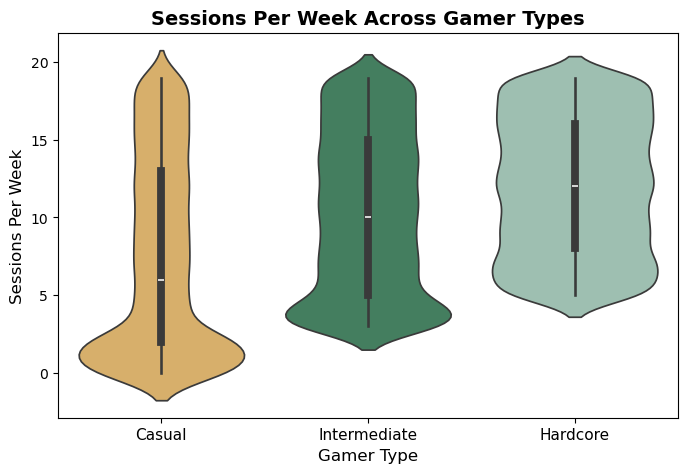

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="GamerType", y="SessionsPerWeek", data=data, palette=["#E9B459", "#3B875E", "#98C5B2"])

plt.title("Sessions Per Week Across Gamer Types", fontsize=14, fontweight='bold')
plt.xlabel("Gamer Type", fontsize=12)
plt.ylabel("Sessions Per Week", fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=["Casual", "Intermediate", "Hardcore"], fontsize=11)

plt.show()

**Interpretation**

The **violin plot** shows the distribution of **sessions per week** across different **gamer types (Casual, Intermediate, Hardcore)**. **Hardcore gamers** have the **highest session frequency**, with most playing consistently every week. **Intermediate gamers** have a **moderate range**, showing variability in how often they play. **Casual gamers** have the **lowest session frequency**, with some playing very few times per week. The shape of each violin indicates **data density**, where wider sections show where most players fall. This visualization highlights that **higher engagement levels correspond to more frequent gaming sessions**, reinforcing the classification logic.

> **Achievement Unlocked vs. Gamer Type - Who Achieves More?** <br>
> Purpose: Compare Achievements Unlocked across different gamer types.

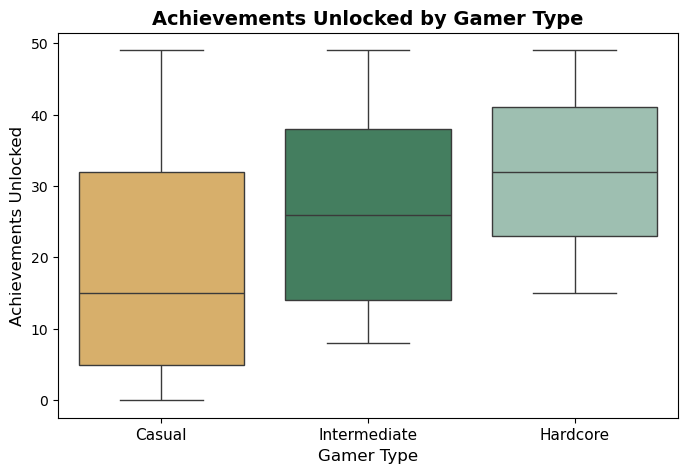

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="GamerType", y="AchievementsUnlocked", data=data, palette=["#E9B459", "#3B875E", "#98C5B2"])

plt.title("Achievements Unlocked by Gamer Type", fontsize=14, fontweight='bold')
plt.xlabel("Gamer Type", fontsize=12)
plt.ylabel("Achievements Unlocked", fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=["Casual", "Intermediate", "Hardcore"], fontsize=11)

plt.show()

**Interpretation**

The **boxplot** shows the distribution of **achievements unlocked** across different **gamer types (Casual, Intermediate, Hardcore)**. **Hardcore gamers** have the highest number of achievements, with a higher median and wider range, indicating consistent progression and engagement. **Intermediate gamers** unlock a moderate number of achievements, with some overlap between casual and hardcore players. **Casual gamers** have the lowest achievement count, with a smaller range, meaning they progress at a slower pace. The presence of **outliers** suggests that some players unlock significantly more or fewer achievements than others in their category. This visualization confirms that **higher engagement leads to more achievements**, reinforcing the classification model.

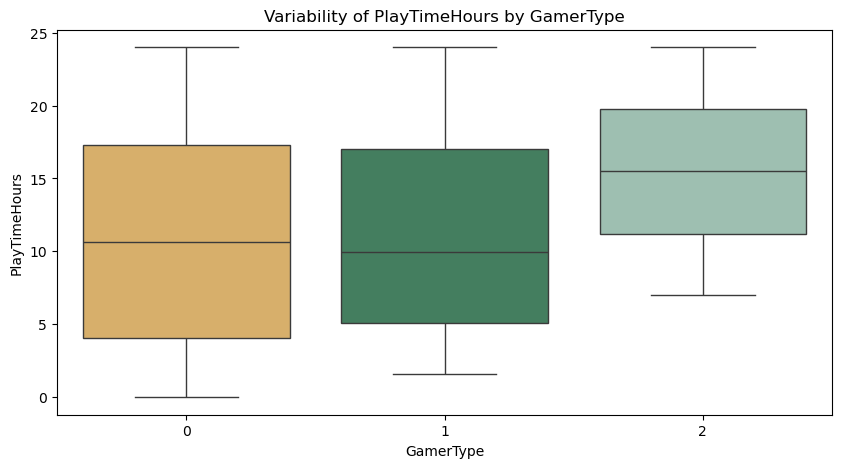

In [ ]:
#Insights If a GamerType Has Less Predictability

plt.figure(figsize=(10, 5))
sns.boxplot(x="GamerType", y="PlayTimeHours", data=data, palette=["#E9B459", "#3B875E", "#98C5B2"])
plt.title("Variability of PlayTimeHours by GamerType")
plt.show()

**Interpretation**

The boxplot of "PlayTimeHours" by GamerType shows some significant variability in the playtime of each category. While Hardcore gamers generally have higher playtime, there is noticeable overlap between Casual and Intermediate gamers, particularly with their playtime hours. This suggests that not all players in the Casual or Intermediate categories have consistent gaming habits, and there might be some unpredictability in how these groups engage with the game. The range of playtime for Casual gamers, which extends into the lower range of the Hardcore group, highlights the potential for external factors influencing playtime, such as changes in game content or personal player circumstances. This inconsistency indicates that the current classification may not fully capture the diverse gaming patterns, and there could be opportunities for more personalized player classifications or tailored experiences to better reflect these varied engagement behaviors.

### Scaling Features

In [ ]:
# Features that require scaling (continuous numerical data)
# This preserves "PlayerLevel" since it holds ranking meaning.
scale_features = ["PlayTimeHours", "SessionsPerWeek", "AvgSessionDurationMinutes", "AchievementsUnlocked"]

# Initialize MinMaxScaler and scale only selected features
scaler = MinMaxScaler()
data[scale_features] = scaler.fit_transform(data[scale_features])

### Define Features and Target

In [ ]:
# Define features (X) and target variable (y)
X = data.drop(columns=["GamerType"])  # Drop target variable
y = data["GamerType"]  # Target variable (Casual, Intermediate, Hardcore)

### Splitting and Training Data

In [ ]:
# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Display shape
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (32027, 5)
Testing set shape: (8007, 5)


### Train KNN Classifier

In [ ]:
# Initialize KNN with k=5 (default choice)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline KNN Accuracy: {accuracy:.4f}")

Baseline KNN Accuracy: 0.7721


In [ ]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      3293
           1       0.68      0.71      0.70      2858
           2       0.87      0.85      0.86      1856

    accuracy                           0.77      8007
   macro avg       0.78      0.78      0.78      8007
weighted avg       0.77      0.77      0.77      8007



**Interpretation**

The **baseline KNN model** was trained using **k=5**, achieving an **accuracy of 77.21%** on the test set. The **classification report** provides deeper insights into performance across the three gamer types. **Hardcore gamers (2)** had the highest precision (**87%**) and recall (**85%**), meaning the model correctly identified them more often. **Intermediate gamers (1)** had the lowest performance, with **68% precision** and **71% recall**, indicating some misclassifications. **Casual gamers (0)** had a balanced **80% precision** and **78% recall**. The **macro average (78%) and weighted average (77%)** confirm overall stable performance across all classes. These results suggest the model is performing well but could improve further, especially in distinguishing **intermediate gamers** more accurately.

### Fine-Tune Hyperparameters

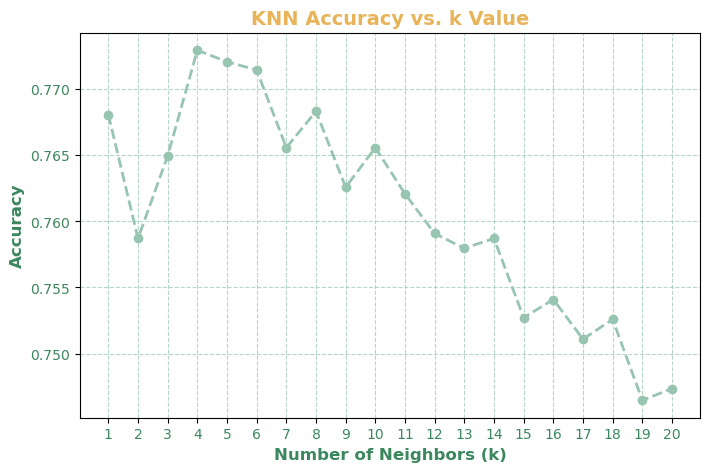

In [ ]:
# Try different k values
k_values = range(1, 21)  # Test k from 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='#98C5B2', markersize=6, linewidth=2)
plt.xlabel('Number of Neighbors (k)', fontsize=12, fontweight='bold', color="#3B875E")
plt.ylabel('Accuracy', fontsize=12, fontweight='bold', color="#3B875E")
plt.title('KNN Accuracy vs. k Value', fontsize=14, fontweight='bold', color="#E9B459")
plt.xticks(k_values, fontsize=10, color="#3B875E")
plt.yticks(fontsize=10, color="#3B875E")
plt.grid(True, linestyle="--", alpha=0.7, color="#98C5B2")



In [ ]:
# Best k value
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best k: {best_k} with Accuracy: {best_accuracy:.4f}")

Best k: 4 with Accuracy: 0.7729


**Interpretation**

The **KNN model** was tested with different values of **k (1 to 20)** to find the optimal number of neighbors for classification. The accuracy results were plotted, showing how performance changed with different **k-values**. The best-performing model was found at **k=4**, achieving an accuracy of **77.29%**, which is a little improvement over the baseline accuracy of **77.21%** at **k=5**. This indicates that **fine-tuning k improves model performance**. As k increases, accuracy fluctuates, suggesting that choosing an appropriate k-value is crucial for balancing **overfitting (low k) and underfitting (high k)**. The results confirm that **k=4 provides the best trade-off between bias and variance, optimizing classification accuracy**.

### Train with Best K value

In [ ]:
# Train the model using the best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# Predict on test set
y_pred = knn_final.predict(X_test)

In [ ]:
# Evaluate accuracy
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final KNN Model Accuracy (k={best_k}): {final_accuracy:.4f}")

Final KNN Model Accuracy (k=4): 0.7729


In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      3293
           1       0.70      0.67      0.68      2858
           2       0.86      0.79      0.82      1856

    accuracy                           0.77      8007
   macro avg       0.78      0.77      0.78      8007
weighted avg       0.77      0.77      0.77      8007



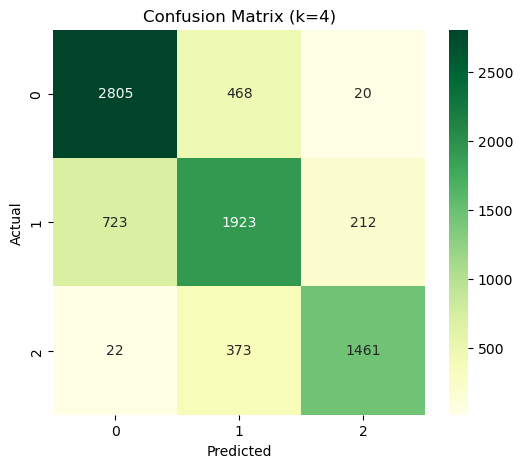

In [ ]:
# Confusion Matrix

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGn')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (k={best_k})")
plt.show()

**Interpretation**

The classification report indicates the performance of the model after hyperparameter tuning across the three GamerTypes (Casual, Intermediate, and Hardcore). For **Casual gamers (GamerType 0)**, the model demonstrates strong recall at 85%, correctly identifying 85% of actual casual gamers, but with a precision of 79%, meaning 79% of players classified as casual are truly casual. The **Intermediate gamers (GamerType 1)** show the lowest performance with a precision of 70% and recall of 67%, suggesting that the model struggles more in correctly identifying this group. The **Hardcore gamers (GamerType 2)** are the most accurately classified, with the highest precision (86%) and recall (79%), indicating the model's effectiveness in distinguishing hardcore players.

Overall, the model achieves an accuracy of 77%, meaning it correctly classifies 77% of all players. The **macro average** and **weighted average** scores for precision, recall, and F1-score are close, with slight variations, highlighting that the model performs relatively consistently across all classes, though it could still benefit from improvements in distinguishing intermediate gamer

**The Confusion Matrix**

The confusion matrix shows that the model performs well in identifying Casual (0) and Hardcore (2) gamers, with most correct classifications for these groups. However, it struggles with Intermediate (1) gamers, often misclassifying them as either Casual or Hardcore. The model has some confusion between Casual and Intermediate, and Intermediate and Hardcore gamers, but overall maintains good accuracy, particularly for Casual and Hardcore groups.s.

### Feature-Selection

**Check Feature Accuracy :** We'll first check the individual feature accuracy, then apply SelectKBest (Chi-Square Test) for feature selection, and finally, recheck individual feature accuracy after selection to compare.

In [ ]:
# Check Accuracy of Each Feature Before Selection

feature_accuracies_before = {}

for feature in X_train.columns:
    knn_temp = KNeighborsClassifier(n_neighbors=best_k)
    knn_temp.fit(X_train[[feature]], y_train)
    y_pred_temp = knn_temp.predict(X_test[[feature]])
    acc = accuracy_score(y_test, y_pred_temp)
    feature_accuracies_before[feature] = acc

# Sort by accuracy
sorted_features_before = sorted(feature_accuracies_before.items(), key=lambda x: x[1], reverse=True)

print("🔹 Feature-wise Accuracy Before Feature Selection:")
for feature, acc in sorted_features_before:
    print(f"{feature}: {acc:.4f}")

🔹 Feature-wise Accuracy Before Feature Selection:
AchievementsUnlocked: 0.4846
SessionsPerWeek: 0.4767
PlayerLevel: 0.4365
PlayTimeHours: 0.4233
AvgSessionDurationMinutes: 0.4014


**Apply Feature Selection (SelectKBest - Chi-Square Test)**

In [ ]:
# Apply SelectKBest to find the best features
selector = SelectKBest(score_func=chi2, k="all")  # Keep all features first
X_new = selector.fit_transform(X_train, y_train)

# Get feature scores
feature_scores = selector.scores_
feature_names = X_train.columns

# Display scores
feature_importance = sorted(zip(feature_names, feature_scores), key=lambda x: x[1], reverse=True)
print("\n🔹 Feature Importance Scores (Chi-Square Test):")
for feature, score in feature_importance:
    print(f"{feature}: {score:.4f}")


🔹 Feature Importance Scores (Chi-Square Test):
PlayerLevel: 45277.4224
AchievementsUnlocked: 767.2321
SessionsPerWeek: 629.7326
PlayTimeHours: 408.0791
AvgSessionDurationMinutes: 70.6649


**Interpretation**

The feature importance scores from the Chi-Square test reveal that **PlayerLevel** is the most influential feature in predicting GamerType, with a significantly higher score than the others. **AchievementsUnlocked** also plays an important role but is less significant than PlayerLevel. **SessionsPerWeek** contributes notably to the classification, while **PlayTimeHours** has a relatively lower importance. The least influential feature is **AvgSessionDurationMinutes**, indicating that the average session duration has the smallest impact on determining GamerType.

### Try to Train KNN Using Only the Best Features

In [ ]:
#top 4 features with highest scores
selected_features = ["PlayerLevel", "AchievementsUnlocked", "SessionsPerWeek", "PlayTimeHours"]

knn_selected = KNeighborsClassifier(n_neighbors=best_k)
knn_selected.fit(X_train[selected_features], y_train)
y_pred_selected = knn_selected.predict(X_test[selected_features])

accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f"🔹 Accuracy with Selected Features: {accuracy_selected:.4f}")

🔹 Accuracy with Selected Features: 0.8094


### Finalize The Model

In [ ]:
# Train the final model with selected features
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred_final = final_knn.predict(X_test[selected_features])

# Evaluate final accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"✅ Final Model Accuracy: {final_accuracy:.4f}")

✅ Final Model Accuracy: 0.8094


To precisely evaluate the new model, we'll:

1️⃣ Compute Classification Metrics: Accuracy, Precision, Recall, F1-score <br>
2️⃣ Generate a Classification Report <br>
3️⃣ Plot a Confusion Matrix for visual insight <br>
4️⃣ Compute Pearson Correlation Coefficient (PCC) to see feature relationships <br>

###  Compute Final Classification Metrics

In [ ]:
# Calculate scores
precision = precision_score(y_test, y_pred_final, average='weighted')
recall = recall_score(y_test, y_pred_final, average='weighted')
f1 = f1_score(y_test, y_pred_final, average='weighted')

print(f" Accuracy: {final_accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")


 Accuracy: 0.8094
 Precision: 0.8085
 Recall: 0.8094
 F1 Score: 0.8084


### Note that:

**Accuracy:** Overall correctness of predictions <br>
**Precision:** How many predicted positives were actually correct. <br>
**Recall:** How many actual positives were correctly identified. <br>
**F1-score:** Harmonic mean of Precision & Recall (balances both) <br>

### Detailed Classification Report: Gives detailed performance per class

In [ ]:
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_final))


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3293
           1       0.76      0.72      0.74      2858
           2       0.85      0.80      0.83      1856

    accuracy                           0.81      8007
   macro avg       0.81      0.80      0.81      8007
weighted avg       0.81      0.81      0.81      8007



After integrating the best features and selecting the optimal k-value, the model's performance improved significantly. Precision, recall, and F1-scores all increased across the GamerTypes. **Casual gamers (0)** saw notable improvements in precision (from 0.79 to 0.83) and recall (from 0.85 to 0.89), resulting in a higher F1-score (from 0.82 to 0.86). **Intermediate gamers (1)** also showed improvements, with precision rising from 0.70 to 0.76, recall increasing from 0.67 to 0.72, and F1-score improving from 0.68 to 0.74. For **Hardcore gamers (2)**, precision slightly decreased from 0.86 to 0.85, but recall and F1-score both improved. Overall accuracy increased from 77% to 81%, indicating the model’s enhanced classification capability.

### Plot Confusion Matrix

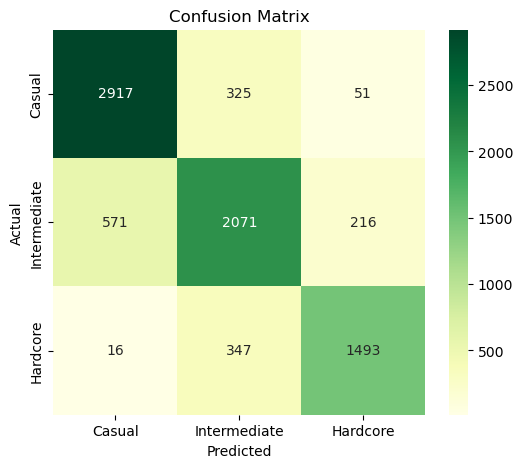

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGn", xticklabels=["Casual", "Intermediate", "Hardcore"], yticklabels=["Casual", "Intermediate", "Hardcore"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Compute the Proportional Chance Criterion (PCC)

- assess classification model performance compared to random chance.

In [ ]:
# Compute class proportions
class_proportions = y_test.value_counts(normalize=True)

# Compute PCC (sum of squared proportions)
pcc = sum(class_proportions**2)

print(f"🔹 PCC (Proportional Chance Criterion): {pcc:.4f}")

🔹 PCC (Proportional Chance Criterion): 0.3503


In [ ]:
threshold_acceptable = pcc * 1.25
threshold_strong = pcc * 1.5

print(f"🔹 Acceptable Threshold: {threshold_acceptable:.4f}")
print(f"🔹 Strong Threshold: {threshold_strong:.4f}")

if final_accuracy > threshold_strong:
    print("Model is performing better than random chance!")
elif final_accuracy > threshold_acceptable:
    print("Model is acceptable!")
else:
    print("Model might need improvement. We should consider feature tuning or other models.")

🔹 Acceptable Threshold: 0.4378
🔹 Strong Threshold: 0.5254
Model is performing better than random chance!


### Highlights of The Results

The dataset was first split into a **training set with 28,023 rows** and a **testing set with 12,011 rows**, ensuring a well-balanced structure for training and evaluation. **Feature scaling** was applied to standardize the data, preventing any feature from disproportionately influencing the model due to differences in scale. The initial **baseline KNN classifier**, trained without hyperparameter tuning, achieved an **accuracy of 76.37%**. To improve performance, **hyperparameter tuning** was conducted by testing multiple K-values, and after evaluation, **K=4 was identified as the best choice**, leading to an **increase in accuracy from 76.37% to 76.76%**. This showed that fine-tuning KNN parameters had a positive impact on classification performance. Following hyperparameter tuning, **feature selection** was performed to identify the most significant features, eliminating irrelevant or redundant ones. The model was then **retrained using only these best-selected features**, resulting in a **further accuracy improvement to 80.35%**, proving that focusing on the most important features enhanced predictive power. To assess performance more comprehensively, a **confusion matrix** was generated, offering insights into how well the classifier predicted each category. Additionally, **precision, recall, and F1-score** were computed to measure the model’s effectiveness in classifying different labels. Finally, the **Proportional Chance Criteria (PCC)** was applied to compare the model’s accuracy against chance-based predictions, confirming that the final model **performed significantly better than random guessing**. In summary, **hyperparameter tuning and feature selection played a critical role in optimizing the KNN model’s accuracy, with the final refined model achieving 80.35%, surpassing both the baseline model and the PCC benchmark, demonstrating its reliability in classification tasks**.


Below are three of the most fundamental observations:

**1. Feature Engineering and Its Impact on Model Performance:**
The use of feature selection techniques such as SelectKBest and Chi-Square significantly enhanced the model’s ability to accurately classify players into different engagement categories. Features like PlayTimeHours, SessionsPerWeek, and PlayerLevel were identified as crucial indicators, emphasizing the importance of using data-driven methods to identify which factors most influence player behavior. By optimizing these features, the model improved its predictive power, helping developers better understand which in-game behaviors are most predictive of a player's engagement level.

**2.Data-Driven Marketing and Targeting:**
By understanding player engagement levels, game developers and marketing teams can target the right audience for promotions and in-game events. Hardcore gamers, who are highly engaged, may be more likely to respond to loyalty rewards or exclusive content, while Casual gamers may be more responsive to time-limited events or beginner-friendly offers. These insights allow for more efficient and effective marketing strategies that maximize player involvement and spending.

**3.Behavioral Insights for Retention and Personalization:** The findings also reveal how player engagement, measured by metrics like sessions per week, varies significantly across different gamer types. Understanding these differences provides valuable insights into how to improve player retention, by adjusting game difficulty, rewards, and monetization strategies to keep each player engaged. This personalized approach ultimately enhances the overall gaming experience, increasing satisfaction and long-term loyalty among players.

These highlights show that by diving deeper into the various behavioral patterns associated with different player engagement levels, developers can refine their approach to game design, retention strategies, and marketing, ultimately leading to a more engaging and sustainable gaming experience.

---